This program reads in and merges multiple output files from the [TIME](https://web.rniapps.net/time/index.php) pairwise Dynamic Time Warping (DTW) Distance workflow (Workflow 5b). The workflow allows for calculations across all samples as well as by condition. Conditions are part of the metadata entered into the application. Our conditions were 'Exacerbated' and 'Stable.' For my analysis, I used the following settings: a taxonomic level of 'Genus', the default DTW constraint of 2 and a 0.1 cutoff for ignoring rare taxa because my input data had already been appropriately filtered. The input data was not rarefied or normalised in the initial upload. The output csv files were automatically generated, with names in the following format:

(participant id)\_(taxonomic level)\_mdtw\_(cutoff for ignoring rare taxa)\_(constraint)\_(condition).csv

For example, one of my output files was named '711_Genus_mdtw_0.1_2_Stable.csv', for the analysis at the genus level of only the samples taken from particpant 711 when in Stable condition.

I have included some images of what the output should look like. To run this code using example data, see Create_TDTW_all_example.

The code may be easily modified to read in and merge multiple files which differ in name only by certain strings or variables.

In [30]:
#import necessary libraries
import pandas as pd
import numpy as np

In [31]:
#make a list of the ID's of participants whose data was analyzed in the workflow
IDs =[708,711,761,762,764,768]

In [32]:
#read the output files from all samples into a dictionary
csv = {}
for i in IDs:
    s = 'F:/CF/Data/TIME/DTW/{}_Genus_mdtw_0.1_2_All.csv'.format(i) 
    csv[i]=pd.read_csv(s)
#If you are reading in files with different extensions, you can set s equal to the filename without extension, 
#create a dictionary for the IDs and file extensions, and then use csv[i]=pd.read_csv(s+dict[i])

In [33]:
#edit column to specify that this is the distance across all samples. 
#the bacteria in our data have underscores before their names, so we join them without any additional strings as separators
for i in csv:
    csv[i]['Taxa1Taxa2'] = csv[i][['Taxa1', 'Taxa2']].apply(lambda x: ''.join(x), axis=1)
    csv[i]=csv[i].drop(['Taxa1','Taxa2'],1)
    csv[i].rename(columns={'TIME_DTW_Distance': 'TDTW_{}_all'.format(i)}, inplace=True)


In [ ]:
#check that it ran properly by looking at one of the dataframes
csv[764].head()

Sample of what a row and the columns should look like, using the trivial example of the distance between Actinomyces and itself: 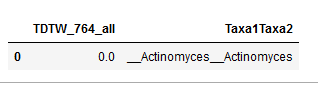

In [34]:
#read the output files from exacerbated samples into a dictionary
csvE = {}
for i in IDs:
    s = 'F:/CF/Data/TIME/DTW/{}_Genus_mdtw_0.1_2_Exacerbation.csv'.format(i) 
    csvE[i]=pd.read_csv(s)
 

In [35]:
#edit column name to specify that this is the distance across samples taken during exacerbations of symptoms 
#the bacteria in our data have underscores before their names, so we join them without any additional strings as separators
for i in csvE:
    csvE[i]['Taxa1Taxa2'] = csvE[i][['Taxa1', 'Taxa2']].apply(lambda x: ''.join(x), axis=1)
    csvE[i]=csvE[i].drop(['Taxa1','Taxa2'],1)
    csvE[i].rename(columns={'TIME_DTW_Distance': 'TDTW_{}_exacerbation'.format(i)}, inplace=True)


In [ ]:
#check that it ran properly by looking at one of the dataframes
csvE[708].head()

Sample of what a row and the columns should look like, using the trivial example of the distance between Actinomyces and itself: 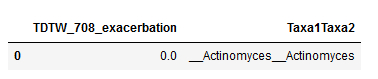

In [36]:
#read the output files from stable samples into a dictionary
csvS = {}
for i in IDs:
    s = 'F:/CF/Data/TIME/DTW/{}_Genus_mdtw_0.1_2_Stable.csv'.format(i) 
    csvS[i]=pd.read_csv(s)

In [37]:
#edit column name to specify that this is the distance across samples taken while clinically stable 
#the bacteria in our data have underscores before their names, so we join them without any additional strings as separators
for i in csvS:
    csvS[i]['Taxa1Taxa2'] = csvS[i][['Taxa1', 'Taxa2']].apply(lambda x: ''.join(x), axis=1)
    csvS[i]=csvS[i].drop(['Taxa1','Taxa2'],1)
    csvS[i].rename(columns={'TIME_DTW_Distance': 'TDTW_{}_stable'.format(i)}, inplace=True)

In [ ]:
#check that it ran properly by looking at one of the dataframes
csvS[768].head()

Sample of what a row and the columns should look like, using the trivial example of the distance between Actinomyces and itself: 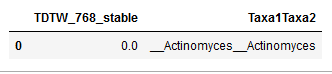

In [ ]:
#merge the dataframes
for i in IDs:
    if i==708:
        result=csv[i]
        result = pd.merge(result, csvE[i], on='Taxa1Taxa2', how= 'outer')
        result = pd.merge(result, csvS[i], on='Taxa1Taxa2', how= 'outer')
    else:
        result = pd.merge(result, csv[i], on='Taxa1Taxa2', how= 'outer')
        result = pd.merge(result, csvE[i], on='Taxa1Taxa2', how= 'outer')
        result = pd.merge(result, csvS[i], on='Taxa1Taxa2', how= 'outer')
result.head()

Sample of what a row and the first few columns should look like at this point, using the trivial example of the distance between Actinomyces and itself: 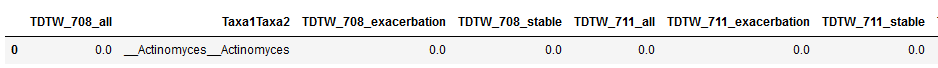 The columns need reordering, and we want to transpose the table.

In [56]:
#sort the columns and transpose, making the columns the bacteria pairs 
#the index becomes the string identifying the participamt and their condition
result = result.reindex(sorted(result.columns), axis=1)
result=result.set_index('Taxa1Taxa2').T


In [ ]:
#check that it ran properly by looking at the first few rows
result.head()

In [27]:
#save file
result.to_csv(r'F:\CF\Data\TIME\DTW\TDTW_all_filtered.csv', index=True)